In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, read_wave, Spectrum, Wave

def serial_corr (wave, lag=1):
    N = len (wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr (wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

Note: you may need to restart the kernel to use updated packages.


## Упражнение 5.1
Блокнот Jupyter этой главы, chap05.ipynb, содержит приложение, в котором можно вычислить автокорреляции для различных lag. Оцените высоты тона вокального чирпа для нескольких времен начала сегмента.


In [2]:
if not os.path.exists('28042__bcjordan__voicedownbew.wav'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav

In [3]:
from thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

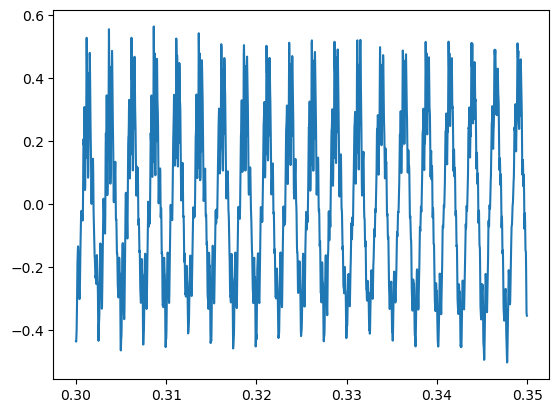

In [4]:
segment = wave.segment(start=0.3, duration=0.05)
segment.plot()

Функция автокореляции:

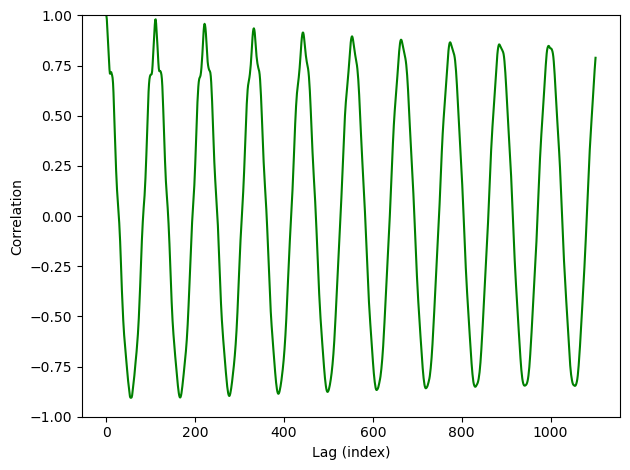

In [5]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag (index)', ylabel='Correlation', ylim=[-1, 1])

In [6]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  111


In [7]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  397.2972972972973


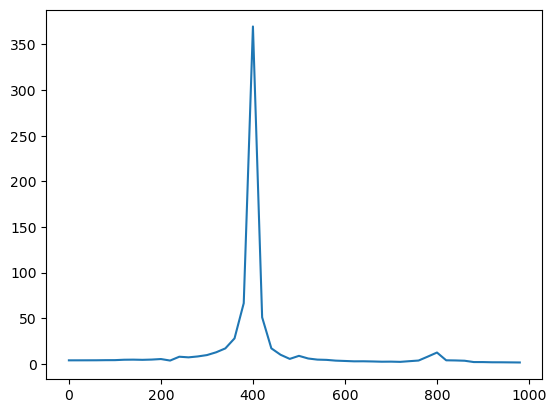

In [8]:
spectrum = segment.make_spectrum().plot(high = 1000)

Высота тона полностью совпадает со спектром.

Вычислим максимальную частоту на другом промежутке:

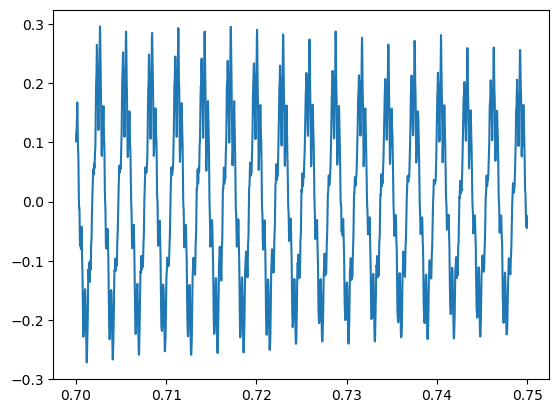

In [9]:
segment = wave.segment(start=0.7, duration=0.05)
segment.plot()

Автокореляция:

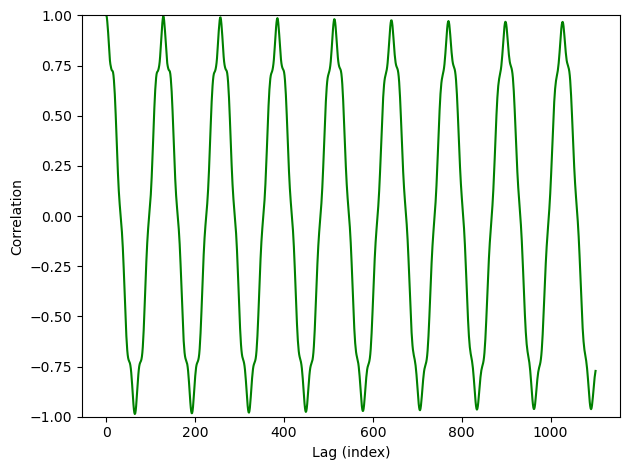

In [10]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag (index)', ylabel='Correlation', ylim=[-1, 1])

In [11]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  128


In [12]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  344.53125


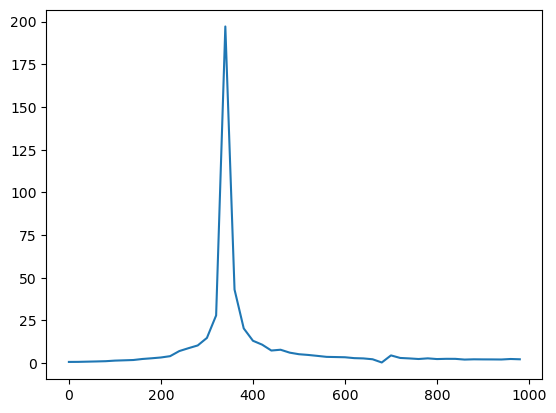

In [13]:
spectrum = segment.make_spectrum().plot(high = 1000)

## Упражнение 5.2
Пример кода в chap05.ipynb показывает, как использовать автокорреляцию для оценки основной частоты периодического сигнала. Инкапсулируйте этот код в функцию, названную estimate_fundamental, и используйте ее для отслеживания высоты тона записанного звука.

Проверьте, насколько хорошо она работает, накладывая оценки высоты тона на спектрограмму записи.

In [14]:
def estimate_fundamental(segment, low=50, high=200):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [15]:
estimate_fundamental(segment)

344.53125

Функция работает корректно, значение совпадает с полученным в п. 5.1.

Просчитаем основную частоту на всей длинне записи, и сравним ее со спектром:

In [16]:
duration = wave.duration
step = 0.05
start = 0.05 #чтобы убрать эффект включения аудиозаписи*
time = []
freq = []
while start + step < duration:
    time.append(start + step/2)
    freq.append(estimate_fundamental(wave.segment(start=start,duration=step)))
    start += step

Сравним спектрограмму и получившуюся функцию высоты:

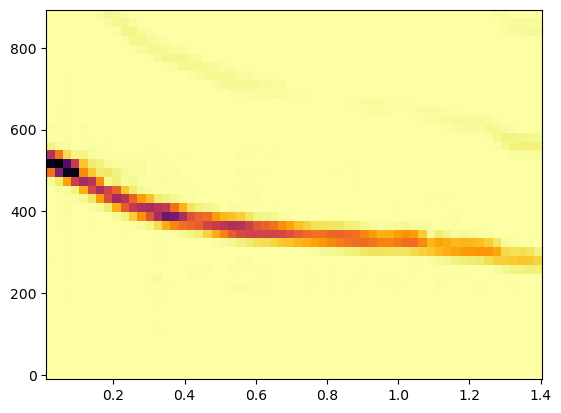

In [17]:
wave.make_spectrogram(2048).plot(high=900)

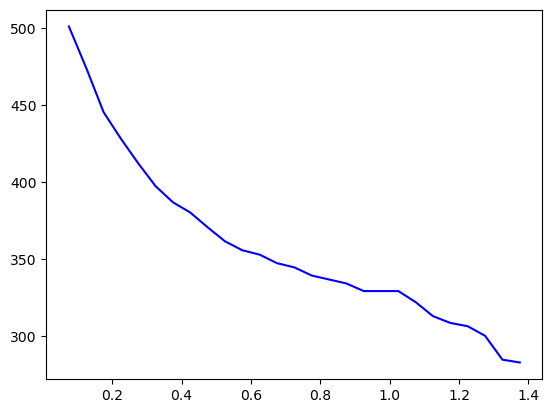

In [18]:
plt.plot(time, freq, color='blue')

Cовместим графики:

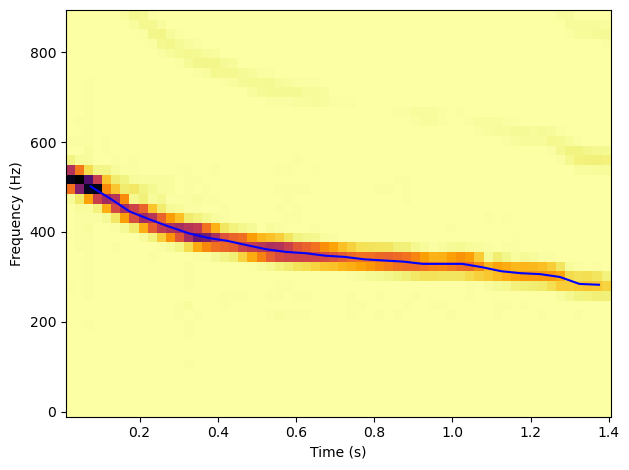

In [19]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(time, freq, color='blue')
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

## Упржанение 5.3
Для упражнений в предыдущей главе были нужны исторические цены BitCoins, и надо было оценить спектр мощности изменения цен. Используя те же данные, вычислите автокорреляции цен в платежной системе Bitcoin. Быстро ли спадает автокорреляционная функция? Есть ли признаки периодичности процесса?

In [20]:
if not os.path.exists('btc_daily_mention.csv'):
    !python -m wget https://github.com/pavelminin2002/Telecom/tree/main/Lab4/btc_daily_mention.csv

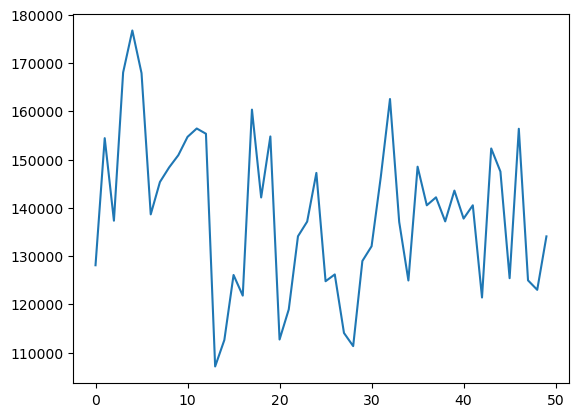

In [21]:
import pandas as pd

df = pd.read_csv('btc_daily_mention.csv')
ys = df['value']
ts = df.index

w = Wave(ys, framerate=1)
w.plot()

Автокорреляция:

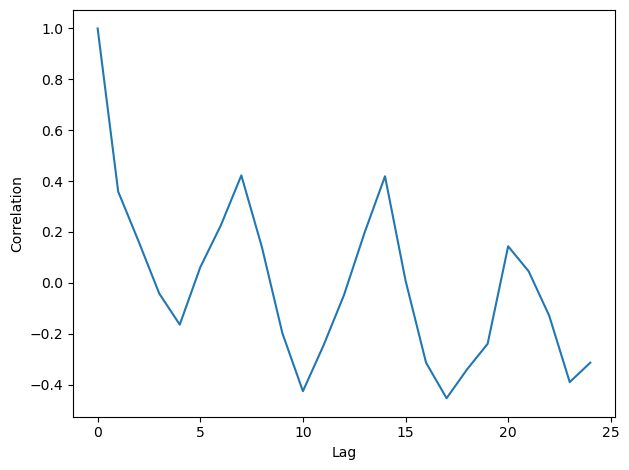

In [22]:
lags, corrs = autocorr(w)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

Автокорреляционная функция спадает быстро, есть признаки периодичности, но опять же здесь вероятно всего слишком маленькая выборка.

## Упражнение 5.4
В репозитории этой книги есть блокнот Jupyter под названием saxophone.ipynb, в котором исследуются автокорреляция, восприятие высоты тона и явление, называемое подавленная основная. Прочтите этот блокнот и «погоняйте» примеры. Выберите другой сегмент записи и вновь поработайте с примерами.

У Ви Харт (Vi Hart) есть отличное видео под названием «Так что же там с шумами(Наука и математика звука, частота и высота тона)». Она демонстрирует феномен подавленной основной и объясняет, как воспринимается высота тона (по крайней мере, насколько об этом известно). См. [https://www.youtube.com/watch?v=i_0DXxNeaQ0](https://www.youtube.com/watch?v=i_0DXxNeaQ0).

In [23]:
if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

In [24]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

Возьмем отрезок

In [25]:
segment = wave.segment(start=5, duration=0.2)
segment.make_audio()

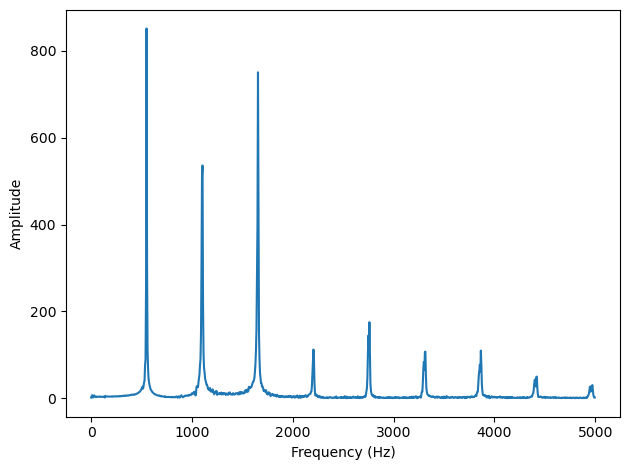

In [26]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [27]:
spectrum.peaks()[:6]

[(851.286051294676, 550.0),
 (750.4194893967243, 1655.0),
 (535.8765203756585, 1105.0),
 (512.9125469185768, 1100.0),
 (432.157194360438, 1660.0),
 (401.13651257944906, 1650.0)]

Возьмем треугольный сигнал с такой же основной частотой

In [28]:
from thinkdsp import TriangleSignal

TriangleSignal(freq=550).make_wave(duration=0.2).make_audio()

Сейчас у сигналов одинаковая воспринимаемая частота - 550

Для анализа применим нашу автокорреляционную функцию

In [29]:
def autocorr_(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

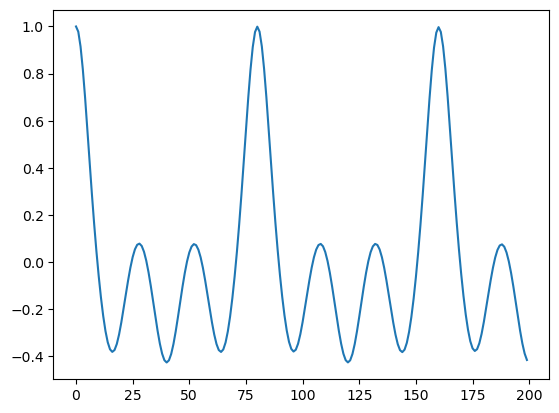

In [30]:
corrs = autocorr_(segment)
plt.plot(corrs[:200])

In [31]:
corrs[79], corrs[80], corrs[81]

(0.9764409474654033, 0.9992407118598032, 0.9780306683523884)

Пик при lag = 80

In [32]:
print("Fmax = ", estimate_fundamental(segment))

Fmax =  551.25


Уберем основной тон:

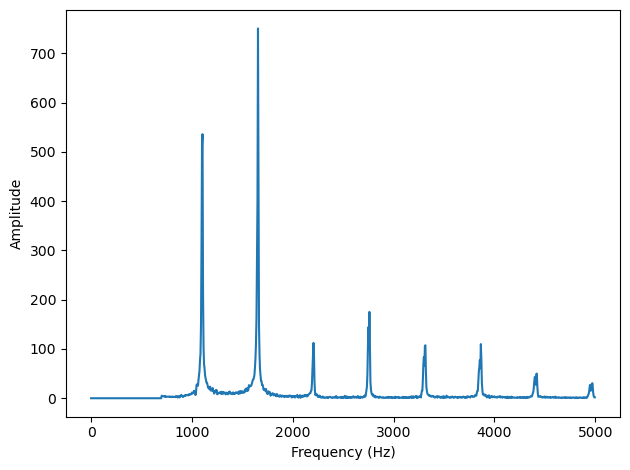

In [33]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(700)
spectrum2.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [34]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

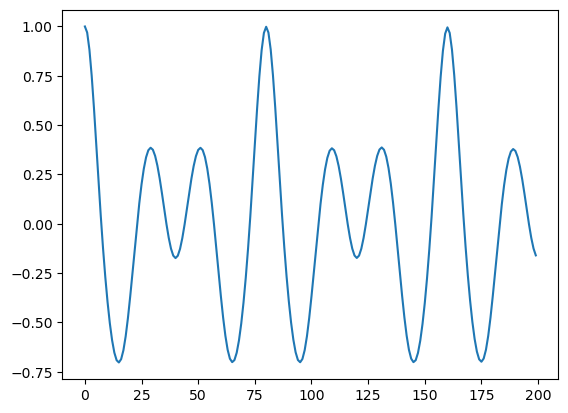

In [35]:
corrs = autocorr_(segment2)
plt.plot(corrs[:200])

In [36]:
corrs[79], corrs[80], corrs[81]

(0.9671520397172799, 0.9984968648709538, 0.969106654315708)

Мы продолжаем воспринимать один и тот же звук, даже если основная частота изменена, потому что гармоники этой частоты всё ещё присутствуют и влияют на наше восприятие.